In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as ss
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Global%20Food%20Prices%20Year%20By%20Year/FAOFP1990_2022.csv", low_memory=False)
df.head(3)

,"Date ""Food.Price.Index"" ""Meat"" ""Dairy"" ""Cereals"" ""Oils"" ""Sugar"""
0,"1 ""01/01/1990"" 64.1 73.4 53.5 64.1 44.59 87.9"
1,"2 ""01/02/1990"" 64.5 76 52.2 62.2 44.5 90.7"
2,"3 ""01/03/1990"" 63.8 77.8 41.4 61.3 45.75 95.1"


In [3]:
df[['Index','Date','Food','Meat', "Dairy" ,"Cereals" ,"Oils" ,"Sugar"]] = df['Date "Food.Price.Index" "Meat" "Dairy" "Cereals" "Oils" "Sugar"'].str.split(' ',n=7, expand=True)
df.drop(['Date "Food.Price.Index" "Meat" "Dairy" "Cereals" "Oils" "Sugar"'], axis=1, inplace=True)
df.head()

,Index,Date,Food,Meat,Dairy,Cereals,Oils,Sugar
0,1,"""01/01/1990""",64.1,73.4,53.5,64.1,44.59,87.9
1,2,"""01/02/1990""",64.5,76,52.2,62.2,44.5,90.7
2,3,"""01/03/1990""",63.8,77.8,41.4,61.3,45.75,95.1
3,4,"""01/04/1990""",65.8,80.4,48.4,62.8,44.02,94.3
4,5,"""01/05/1990""",64.4,81,39.2,62,45.5,90.4


In [4]:
df[['Day','Month','Year']] = df['Date'].str.split('/',n=3, expand=True).replace(r'[^\w\s]', ' ', regex=True)

df.drop(['Day','Date','Index'], axis=1, inplace=True)

In [5]:
for i in df.columns:
    df[i]=pd.to_numeric(df[i])

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Food,390.0,84.974359,25.680581,50.50,63.7250,78.450,99.0000,159.7
Meat,390.0,83.771026,16.833919,51.10,70.6250,82.100,97.0750,125.9
Dairy,390.0,83.600000,32.682621,36.80,55.0500,76.200,109.1500,156.5
Cereals,390.0,86.184615,31.002685,48.60,60.0250,84.200,101.7500,173.5
Oils,390.0,88.221897,37.704093,35.83,62.2625,80.415,105.7525,251.8
Sugar,390.0,80.760513,31.144603,31.80,57.9500,74.900,99.0000,183.2
Month,390.0,6.433333,3.437943,1.00,3.0000,6.000,9.0000,12.0
Year,390.0,2005.758974,9.404826,1990.00,1998.0000,2006.000,2014.0000,2022.0


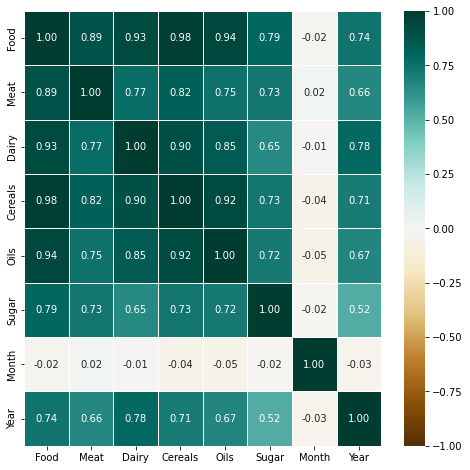

In [7]:
fig, ax = plt.subplots(figsize=(8,8))
corr1   = df.corr()
sns.heatmap(corr1, ax=ax, annot=True, cmap='BrBG', fmt=".2f", linewidths=.5, vmin=-1, vmax=1)
None

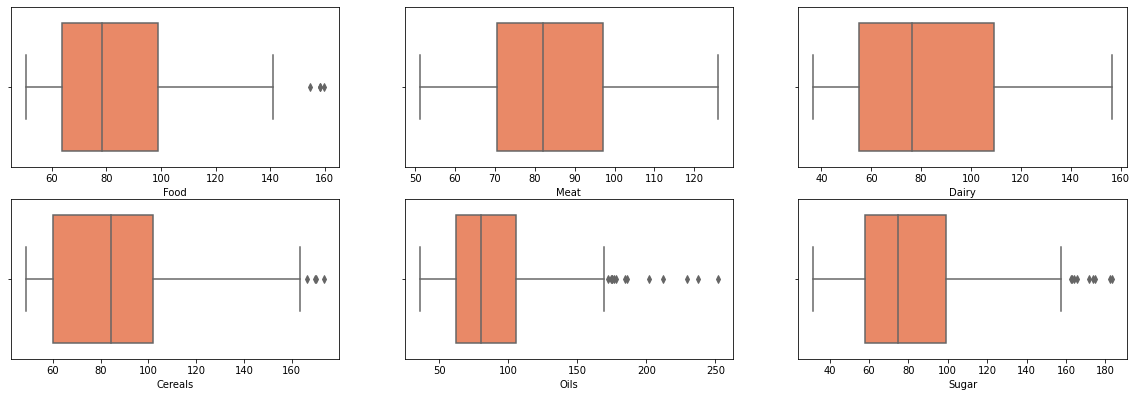

In [8]:
dfx = df[['Food', 'Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar']]
i = 1
plt.figure(figsize=(20, 10))
for feature in dfx.columns:
    plt.subplot(3, 3, i)
    sns.boxplot(x=dfx[feature], color="#FF7F51")
    i += 1

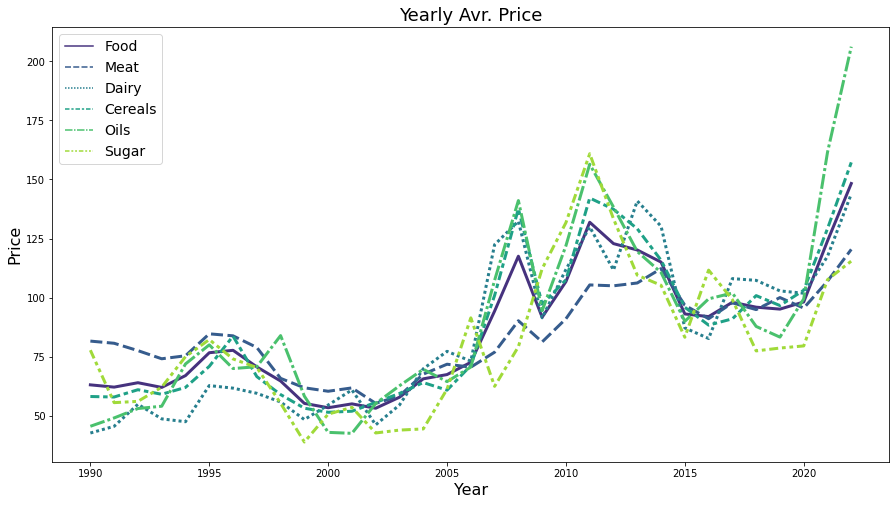

In [9]:
dfx = df[['Food', 'Meat', 'Dairy', 'Cereals', 'Oils', 'Sugar' ,'Year']]
dfx = dfx.groupby(['Year'],as_index=False).mean()
dfx.set_index('Year', inplace=True,)
plt.figure(figsize=(15 ,8))
sns.lineplot(data=dfx , palette='viridis',linewidth=3 )
plt.title('Yearly Avr. Price', fontsize=18)
plt.ylabel('Price', size=16)
plt.xlabel('Year', size=16)
plt.legend(fontsize=14)
None

In [10]:
(dfx.
 pct_change().
 style.
 highlight_max(color="#A5191E").
 highlight_min(color="#356518").
 format("{:.2%}", na_rep="-"))

,Food,Meat,Dairy,Cereals,Oils,Sugar
Year,,,,,,
1990,-,-,-,-,-,-
1991,-1.52%,-1.12%,6.69%,-0.37%,7.78%,-28.59%
1992,3.01%,-3.87%,20.53%,5.34%,8.13%,0.98%
1993,-3.12%,-4.45%,-11.30%,-3.17%,1.84%,10.71%
1994,8.07%,1.71%,-2.47%,4.93%,33.17%,20.84%
1995,14.48%,12.35%,32.27%,14.40%,11.26%,9.67%
1996,1.34%,-1.00%,-1.73%,18.07%,-12.54%,-9.99%
1997,-9.06%,-5.88%,-3.54%,-20.47%,1.07%,-4.89%
1998,-8.45%,-16.60%,-6.18%,-11.46%,18.68%,-21.53%


/usr/local/lib/python3.9/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
<ipython-input-11-1ac295b715db>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_heatmap['Month'] = pd.Categorical(df_heatmap['Month'], categories=new_order, ordered=True)


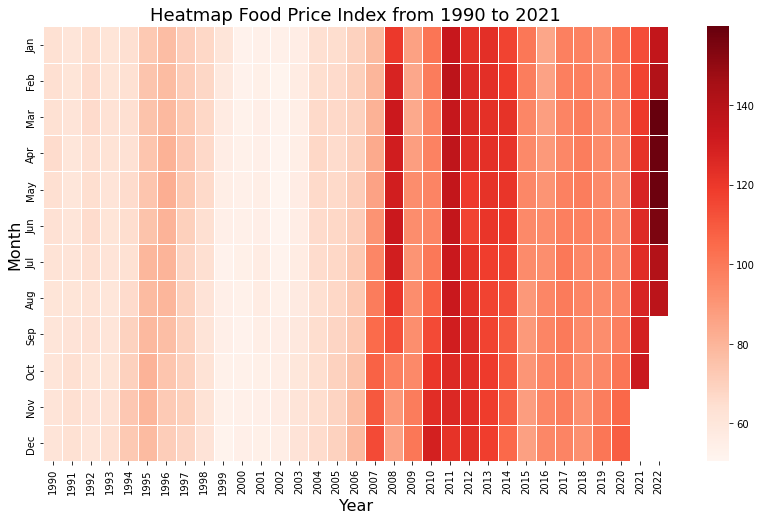

In [11]:
df_heatmap          = df[['Month','Year','Food']]
df_heatmap.Month    = df_heatmap.Month.replace({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul',
                                                8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})
new_order           = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
df_heatmap['Month'] = pd.Categorical(df_heatmap['Month'], categories=new_order, ordered=True)
temp_matrix         = df_heatmap.pivot("Month", "Year", "Food")

fig = plt.figure(figsize=(14,8))
r   = sns.heatmap(temp_matrix,  cmap='Reds', linewidths=.5)
r.set_title("Heatmap Food Price Index from 1990 to 2021" ,fontsize=18)
plt.xlabel('Year', size=16)
plt.ylabel('Month', size=16)
None

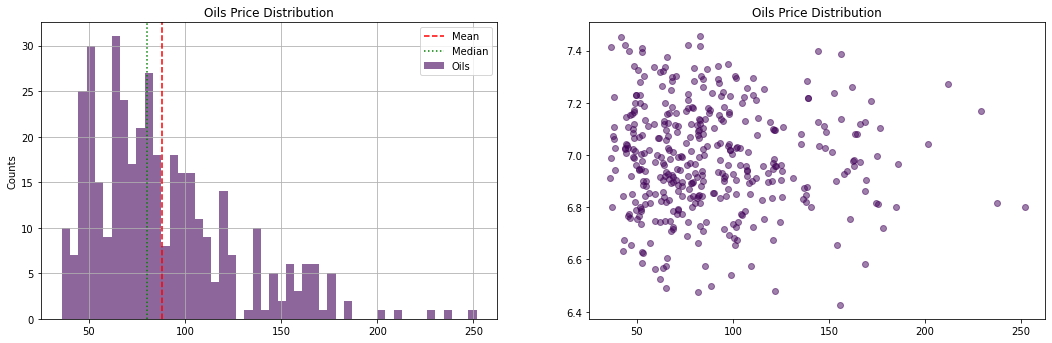

In [12]:
plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
df['Oils'].hist(bins=50, label='Oils', alpha=0.6, color='#410258')
plt.axvline(np.mean(df['Oils']), ls='--', c='r', label="Mean")
plt.axvline(np.median(df['Oils']), ls=':', c='g', label="Median")
plt.ylabel("Counts")
plt.title("Oils Price Distribution")
plt.legend()

plt.subplot(2, 2, 2)
plt.scatter(df['Oils'], np.random.normal(7, 0.2, size=df.shape[0]), alpha=0.5 ,color='#410258')
plt.title("Oils Price Distribution")
None